In [1]:
import pandas as pd
import numpy as np
#Librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns


## Leer dataset

In [2]:
path = "stroke_dataset.csv"
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [5]:
for col in ["work_type", "Residence_type", "smoking_status"]:
    print(f"Valores en '{col}':")
    for i in df[col].unique():
        print("\t"+str(i))
    print()

Valores en 'work_type':
	Private
	Self-employed
	Govt_job
	children

Valores en 'Residence_type':
	Urban
	Rural

Valores en 'smoking_status':
	formerly smoked
	never smoked
	smokes
	Unknown



In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

/home/raul/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

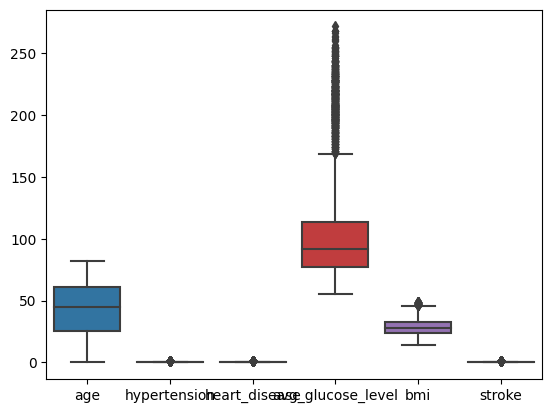

In [7]:
sns.boxplot(data=df)

In [8]:
df = df.drop(["ever_married"], axis=1)

In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [10]:
X = df.drop("stroke", axis = 1)
y = df["stroke"]

In [11]:
X.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [13]:
categoricas = ["gender", "work_type", "Residence_type", "smoking_status"]
numericas = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

In [14]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [16]:
X = transformer.fit_transform(X)

In [17]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__hypertension,transformer_numerico__heart_disease,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_Female,transformer_categorico__gender_Male,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,transformer_categorico__work_type_children,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.647564,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.975586,0.0,1.0,0.234512,0.530086,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.597168,0.0,0.0,0.536008,0.584527,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.963379,1.0,0.0,0.549349,0.286533,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.987793,0.0,0.0,0.605161,0.429799,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.0,0.0,0.069384,0.452722,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4977,0.487305,0.0,0.0,0.627966,0.489971,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4978,0.548340,1.0,0.0,0.184194,0.510029,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4979,0.487305,0.0,0.0,0.133044,0.458453,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
transformer.output_indices_

{'transformer_numerico': slice(0, 5, None),
 'transformer_categorico': slice(5, 17, None),
 'remainder': slice(0, 0, None)}

### ENTRENAR

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [20]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [21]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    #accuracy del modelo
    acc = accuracy_score(y_test, y_predict)
    #overfitting
    y_pred_train = mod.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    print(nombre_modelo)
    print()
    
    print(f"Accuaracy: {acc}")
    print(f"Accuaracy_train: {acc_train}")

In [22]:
train_evaluate("SVC", SVC)

SVC

Accuaracy: 0.949438202247191
Accuaracy_train: 0.9504685408299867


In [23]:
train_evaluate("GradientBoost", GradientBoostingClassifier)

GradientBoost

Accuaracy: 0.9470304975922953
Accuaracy_train: 0.9593038821954485


In [24]:
train_evaluate("Decission Tree", DecisionTreeClassifier)

Decission Tree

Accuaracy: 0.9197431781701445
Accuaracy_train: 1.0


In [25]:
train_evaluate("Gaussiano", GaussianNB)

Gaussiano

Accuaracy: 0.833868378812199
Accuaracy_train: 0.8340026773761714


In [26]:
train_evaluate("KNN", KNeighborsClassifier)

KNN

Accuaracy: 0.9478330658105939
Accuaracy_train: 0.951004016064257


In [27]:
train_evaluate("RANDOM", RandomForestClassifier)

RANDOM

Accuaracy: 0.9478330658105939
Accuaracy_train: 1.0


In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predic = clf.predict(X_test)
accuracy_score(y_test, predic)

0.949438202247191

In [29]:
clf = SVC().fit(X_train, y_train)
predic = clf.predict(X_test)
accuracy_score(y_test, predic)

0.949438202247191

In [30]:
import joblib 
joblib.dump(clf, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [31]:
#submission_preds = clf.predict(X_test_test)

# Tratatamos la entrada de datos de un paciente nuevo

In [32]:

#Mensaje de bienvenida
print("¡Hola! Introduce los datos del nuevo paciente")

#Escribimos genero
gender = input("Por favor ingrese el genero del paciente (Male/Female): ")

#Escribimos work_type
work_type = input("\nPor favor ingrese el tipo de trabajo(Private/Self-employed/Govt_job/children): \n")

##Leemos Residence_type
residence_type = input("\nPor favor ingrese el tipo de residencia(Urban/Rural): \n")

##Leemos smoking_status
smoking_status = input("\nPor favor ingrese el tipo de fumador(formerly smoked/never smoked/smokes/Unknown): \n")

##Leemos age
age = input("\nPor favor ingrese la edad del pàciente: \n")

##Leemos hypertension
hypertension = input("\nPor favor ingrese la hipertension(1 or 0): \n")

##Leemos heart_disease
heart_disease = input("\nPor favor ingrese si esta enfermo del corazón(1 or 0): \n")

##Leemos avg_glucose_level
avg_glucose_level = input("\nPor favor ingrese nivel medio de glucosa: \n")

##Leemos avg_glucose_level
bmi = input("\nPor favor ingrese el BMI (Base Muscle Index): \n")

#Age será un entero o binario (0 ó 1)
age = int(age)
#BMI, avg_glucose_level será un real, así que usamos float()
bmi = float(bmi)
avg_glucose_level = float(avg_glucose_level)
#Bool
heart_disease = int(heart_disease)
hypertension = int(hypertension)

list_variables_predictoras = [[gender, age, hypertension, heart_disease, work_type, residence_type, avg_glucose_level, bmi, smoking_status]]

list_variables_predictoras

#Llamo a mi funcion predictora
#predict(variables_predictoras)

list_variables_predictoras

columns = ['gender', 'age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X_valid = pd.DataFrame(list_variables_predictoras, columns = columns)


¡Hola! Introduce los datos del nuevo paciente


Por favor ingrese el genero del paciente (Male/Female):  Male

Por favor ingrese el tipo de trabajo(Private/Self-employed/Govt_job/children): 
 Private

Por favor ingrese el tipo de residencia(Urban/Rural): 
 Urban

Por favor ingrese el tipo de fumador(formerly smoked/never smoked/smokes/Unknown): 
 smokes

Por favor ingrese la edad del pàciente: 
 79

Por favor ingrese la hipertension(1 or 0): 
 1

Por favor ingrese si esta enfermo del corazón(1 or 0): 
 1

Por favor ingrese nivel medio de glucosa: 
 170

Por favor ingrese el BMI (Base Muscle Index): 
 35


In [33]:
X_valid

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,79,1,1,Private,Urban,170.0,35.0,smokes


In [34]:
X_valid
print("GradientBoosting")
modelo = GradientBoostingClassifier
mod = modelo()
mod.fit(X_train, y_train)

#Me falta las transformaciones de X_test
X_valid = transformer.transform(X_valid)

#pd.DataFrame(X_test, columns = transformer.get_feature_names_out())

y_predict = mod.predict(X_valid)
print("Stroke: ", y_predict)

## Matrix. Transformacion variables predictoras
#model.predict()

GradientBoosting
Stroke:  [0]
